### Ejercicio 1

In [40]:
from typing import Callable
# ####################################################################
def ODE_euler(
    *,
    a: float,
    b: float,
    f: Callable[[float, float], float],
    y_t0: float,
    N: int,
) -> tuple[list[float], list[float], float]:
    h = 0.5
    t = a
    ts = [t]
    ys = [y_t0]

    for _ in range(N):
        y = ys[-1]
        y += h * f(t, y)
        ys.append(y)

        t += h
        ts.append(t)
    return ys, ts, h

In [41]:
import math
import matplotlib.pyplot as plt
f = lambda t, y: t * math.exp(3*t) - 2*y
y_t0 = 0

a = 0
b = 1

ys,ts, h = ODE_euler(a=a, b=b, y_t0=y_t0, f=f, N=10)
ys


[0,
 0.0,
 1.1204222675845161,
 10.042768461593834,
 67.51284847539137,
 403.4287934927351,
 2260.053018070079,
 12154.625891363077,
 63552.129679931604,
 325509.58283800783,
 1641186.8321573278]

In [42]:
import math
import matplotlib.pyplot as plt
f = lambda t, y: 1 + (t - y)**2
y_t0 = 1

a = 2
b = 3

ys,ts, h = ODE_euler(a=a, b=b, y_t0=y_t0, f=f, N=10)
ys


[1,
 2.0,
 2.625,
 3.1953125,
 3.741729736328125,
 4.275081500876695,
 4.800375666500635,
 5.320300603763168,
 5.836446540267109,
 6.349821407362408,
 6.861098212205712]

In [43]:
from typing import Callable
# ####################################################################
def ODE_euler2(
    *,
    a: float,
    b: float,
    f: Callable[[float, float], float],
    y_t0: float,
    N: int,
) -> tuple[list[float], list[float], float]:
    h = 0.25
    t = a
    ts = [t]
    ys = [y_t0]

    for _ in range(N):
        y = ys[-1]
        y += h * f(t, y)
        ys.append(y)

        t += h
        ts.append(t)
    return ys, ts, h

In [44]:
import math
import matplotlib.pyplot as plt
f = lambda t, y: 1 + y/t
y_t0 = 2

a = 1
b = 2

ys,ts, h = ODE_euler2(a=a, b=b, y_t0=y_t0, f=f, N=10)
ys


[2,
 2.75,
 3.55,
 4.391666666666667,
 5.269047619047619,
 6.177678571428571,
 7.114087301587301,
 8.075496031746031,
 9.059632034632033,
 10.064601370851369,
 11.088801476301475]

In [47]:
import math
import matplotlib.pyplot as plt
f = lambda t, y: math.cos(2*t) + math.sin(3*t)
y_t0 = 1

a = 0
b = 1

ys,ts, h = ODE_euler2(a=a, b=b, y_t0=y_t0, f=f, N=10)
ys

[1,
 1.25,
 1.6398053304784268,
 2.0242546535964756,
 2.2364572532353817,
 2.1677005461135628,
 1.8245243125412434,
 1.3326436589748578,
 0.8837958637955108,
 0.6505310840298764,
 0.7103431526173358]

### Ejercicio 2

In [75]:
import numpy as np
import pandas as pd
import math
from typing import Callable

# Soluciones exactas
def exact_solution_a(t):
    return (t / 5) * np.exp(3 * t) - (1 / 25) * np.exp(3 * t) + (1 / 25) * np.exp(-2 * t)

def exact_solution_b(t):
    return t + 1 / (1 - t)

def exact_solution_c(t):
    return t * np.log(t) + 2 * t

def exact_solution_d(t):
    return (1 / 2) * np.sin(2 * t) - (1 / 3) * np.cos(3 * t) + 4 / 3

# Definimos las derivadas
f_a = lambda t, y: t * math.exp(3 * t) - 2 * y
f_b = lambda t, y: 1 + (t - y)**2
f_c = lambda t, y: 1 + y / t
f_d = lambda t, y: math.cos(2 * t) + math.sin(3 * t)

# Implementamos el método de Euler
def ODE_euler(a: float, b: float, f: Callable[[float, float], float], y_t0: float, h: float) -> tuple[list[float], list[float]]:
    t = a
    ts = [t]
    ys = [y_t0]

    while t < b:
        y = ys[-1]
        y += h * f(t, y)
        ys.append(y)
        t += h
        ts.append(t)
    
    return ys, ts

# Parámetros del problema
params = [
    (f_a, 0, 1, 0, 0.5, exact_solution_a),
    (f_b, 2, 3, 1, 0.5, exact_solution_b),
    (f_c, 1, 2, 2, 0.25, exact_solution_c),
    (f_d, 0, 1, 1, 0.25, exact_solution_d)
]

# Solucionamos los problemas usando el método de Euler y guardamos los resultados en archivos CSV
for i, (f, a, b, y0, h, exact_solution) in enumerate(params, 1):
    ys, ts = ODE_euler(a=a, b=b, f=f, y_t0=y0, h=h)
    exact_ys = [exact_solution(t) for t in ts]
    errors = [abs(ys[j] - exact_ys[j]) for j in range(len(ts))]
    
    results = pd.DataFrame({"t": ts, "y_aprox": ys, "y_exact": exact_ys, "error": errors})
    filename = f"results_{i}.csv"
    results.to_csv(filename, index=False)
    
print("Aproximaciones y errores guardados en archivos CSV.")



Aproximaciones y errores guardados en archivos CSV.



Método de Euler para y' = te^{3t} - 2y
     t   y_aprox   y_exact     error
0  0.0  0.000000  0.000000  0.000000
1  0.5  0.000000  0.283617  0.283617
2  1.0  1.120422  3.219099  2.098677


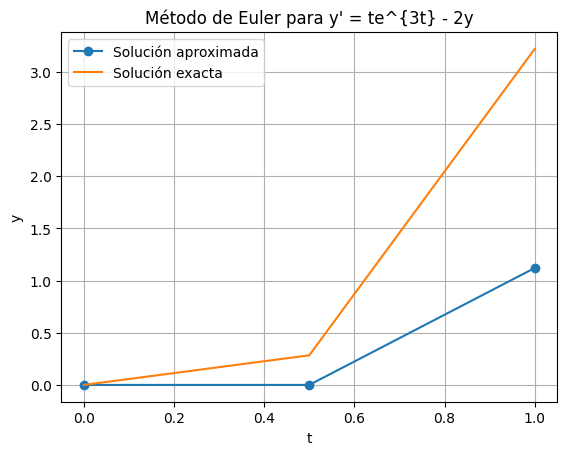


Método de Euler para y' = 1 + (t - y)^2
     t  y_aprox   y_exact     error
0  2.0    1.000  1.000000  0.000000
1  2.5    2.000  1.833333  0.166667
2  3.0    2.625  2.500000  0.125000


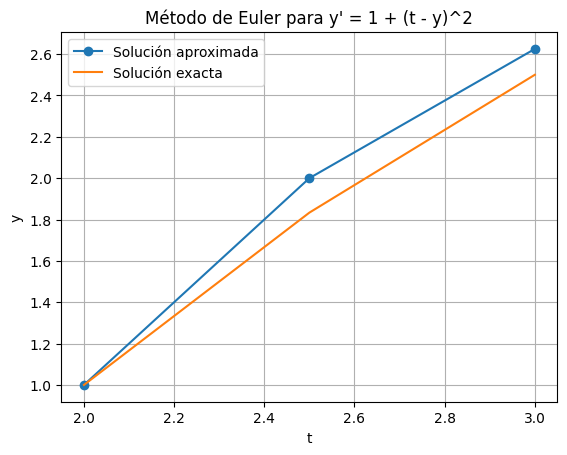


Método de Euler para y' = 1 + y/t
      t   y_aprox   y_exact     error
0  1.00  2.000000  2.000000  0.000000
1  1.25  2.750000  2.778929  0.028929
2  1.50  3.550000  3.608198  0.058198
3  1.75  4.391667  4.479328  0.087661
4  2.00  5.269048  5.386294  0.117247


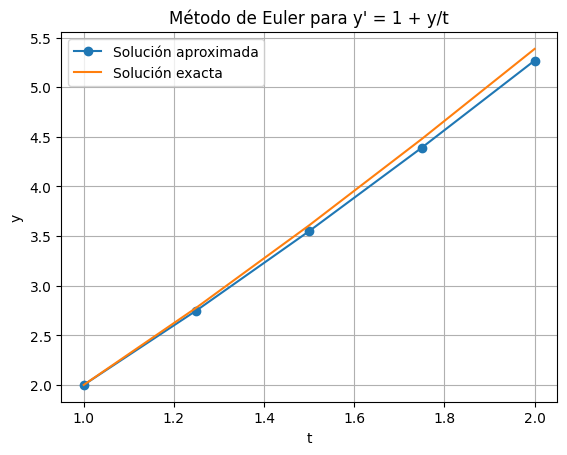


Método de Euler para y' = cos 2t + sin 3t
      t   y_aprox   y_exact     error
0  0.00  1.000000  1.000000  0.000000
1  0.25  1.250000  1.329150  0.079150
2  0.50  1.639805  1.730490  0.090684
3  0.75  2.024255  2.041472  0.017217
4  1.00  2.236457  2.117980  0.118478


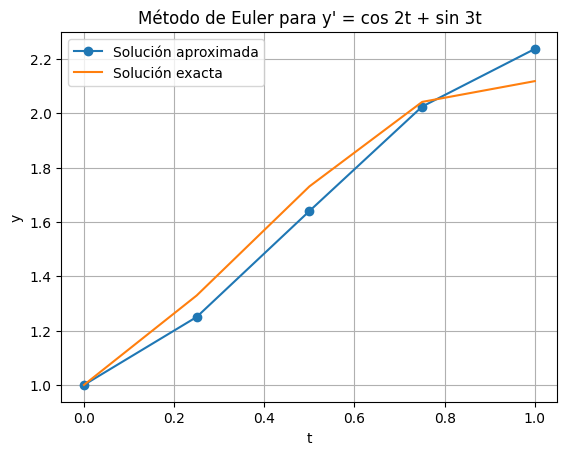

In [76]:
import pandas as pd

# Archivos CSV con los resultados
filenames = ["results_1.csv", "results_2.csv", "results_3.csv", "results_4.csv"]
titles = [
    "Método de Euler para y' = te^{3t} - 2y",
    "Método de Euler para y' = 1 + (t - y)^2",
    "Método de Euler para y' = 1 + y/t",
    "Método de Euler para y' = cos 2t + sin 3t"
]

# Leemos y mostramos los resultados
for filename, title in zip(filenames, titles):
    data = pd.read_csv(filename)
    print(f"\n{title}")
    print(data)

    # Graficamos la solución aproximada y exacta
    plt.figure()
    plt.plot(data["t"], data["y_aprox"], marker='o', label="Solución aproximada")
    plt.plot(data["t"], data["y_exact"], label="Solución exacta")
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


### Ejercicio 3

In [53]:
from typing import Callable
# ####################################################################
def ODE_euler(
    *,
    a: float,
    b: float,
    f: Callable[[float, float], float],
    y_t0: float,
    N: int,
) -> tuple[list[float], list[float], float]:
    h = 0.1
    t = a
    ts = [t]
    ys = [y_t0]

    for _ in range(N):
        y = ys[-1]
        y += h * f(t, y)
        ys.append(y)

        t += h
        ts.append(t)
    return ys, ts, h

In [54]:
import matplotlib.pyplot as plt
f = lambda t, y: y/t - (y/t)**2
y_t0 = 1

a = 1
b = 2

ys,ts, h = ODE_euler(a=a, b=b, y_t0=y_t0, f=f, N=10)
ys


[1,
 1.0,
 1.0082644628099173,
 1.0216894717270375,
 1.038514734248178,
 1.0576681921408762,
 1.0784610936317547,
 1.100432164699466,
 1.1232620515812632,
 1.1467235965295264,
 1.1706515695646647]

In [57]:
from typing import Callable
# ####################################################################
def ODE_euler2(
    *,
    a: float,
    b: float,
    f: Callable[[float, float], float],
    y_t0: float,
    N: int,
) -> tuple[list[float], list[float], float]:
    h = 0.2
    t = a
    ts = [t]
    ys = [y_t0]

    for _ in range(N):
        y = ys[-1]
        y += h * f(t, y)
        ys.append(y)

        t += h
        ts.append(t)
    return ys, ts, h

In [58]:
import matplotlib.pyplot as plt
f = lambda t, y: 1 + y/t + (y/t)**2
y_t0 = 0

a = 1
b = 3

ys,ts, h = ODE_euler2(a=a, b=b, y_t0=y_t0, f=f, N=10)
ys

[0,
 0.2,
 0.4388888888888889,
 0.721242756361804,
 1.0520380316573712,
 1.4372511475238394,
 1.8842608053291532,
 2.402269588561542,
 3.0028371645572136,
 3.7006007049327985,
 4.5142774281767]

In [69]:
import matplotlib.pyplot as plt
f = lambda t, y: -(y + 1)*(y + 3)
y_t0 = -2

a = 0
b = 2

ys,ts, h = ODE_euler2(a=a, b=b, y_t0=y_t0, f=f, N=10)
ys

[-2,
 -1.8,
 -1.608,
 -1.4387328000000001,
 -1.3017369739591682,
 -1.199251224666308,
 -1.1274909449059896,
 -1.079745355150198,
 -1.0491190774237251,
 -1.0299539832076265,
 -1.0181518381465764]

In [61]:
import matplotlib.pyplot as plt
f = lambda t, y: -5*y +5*(t)**2 +2*t
y_t0 = 1/3

a = 0
b = 1

ys,ts, h = ODE_euler(a=a, b=b, y_t0=y_t0, f=f, N=10)
ys

[0.3333333333333333,
 0.16666666666666666,
 0.10833333333333334,
 0.11416666666666667,
 0.16208333333333336,
 0.2410416666666667,
 0.34552083333333333,
 0.4727604166666667,
 0.6213802083333333,
 0.7906901041666666,
 0.9803450520833332]

### Ejercicio 4

In [73]:
import numpy as np
import pandas as pd
import math
from typing import Callable

# Soluciones exactas
def exact_solution_a(t):
    return t / (1 + math.log(t))

def exact_solution_b(t):
    return t * math.tan(math.log(t))

def exact_solution_c(t):
    return -3 + 2 / (1 + math.exp(-2 * t))

def exact_solution_d(t):
    return t ** 2 + (1 / 3) * math.exp(-5 * t)

# Definimos las derivadas
f_a = lambda t, y: y/t - (y/t)**2
f_b = lambda t, y: 1 + y/t + (y/t)**2
f_c = lambda t, y: -(y + 1)*(y + 3)
f_d = lambda t, y: -5*y +5*(t)**2 +2*t

# Implementamos el método de Euler
def ODE_euler(a: float, b: float, f: Callable[[float, float], float], y_t0: float, h: float) -> tuple[list[float], list[float]]:
    t = a
    ts = [t]
    ys = [y_t0]

    while t < b:
        y = ys[-1]
        y += h * f(t, y)
        ys.append(y)
        t += h
        ts.append(t)
    
    return ys, ts

# Parámetros del problema
params = [
    (f_a, 1, 2, 1, 0.1, exact_solution_a),
    (f_b, 1, 3, 0, 0.2, exact_solution_b),
    (f_c, 0, 2, -2, 0.2, exact_solution_c),
    (f_d, 0, 1, 1/3, 0.1, exact_solution_d)
]

# Solucionamos los problemas usando el método de Euler y guardamos los resultados en archivos CSV
for i, (f, a, b, y0, h, exact_solution) in enumerate(params, 1):
    ys, ts = ODE_euler(a=a, b=b, f=f, y_t0=y0, h=h)
    exact_ys = [exact_solution(t) for t in ts]
    errors = [abs(ys[j] - exact_ys[j]) for j in range(len(ts))]
    
    results = pd.DataFrame({"t": ts, "y_aprox": ys, "y_exact": exact_ys, "error": errors})
    filename = f"results_4.{i}.csv"
    results.to_csv(filename, index=False)
    
print("Aproximaciones y errores guardados en archivos CSV.")


Aproximaciones y errores guardados en archivos CSV.



Método de Euler para y' = t / (1 + ln t)
      t   y_aprox   y_exact     error
0   1.0  1.000000  1.000000  0.000000
1   1.1  1.000000  1.004282  0.004282
2   1.2  1.008264  1.014952  0.006688
3   1.3  1.021689  1.029814  0.008124
4   1.4  1.038515  1.047534  0.009019
5   1.5  1.057668  1.067262  0.009594
6   1.6  1.078461  1.088433  0.009972
7   1.7  1.100432  1.110655  0.010223
8   1.8  1.123262  1.133654  0.010392
9   1.9  1.146724  1.157228  0.010505
10  2.0  1.170652  1.181232  0.010581


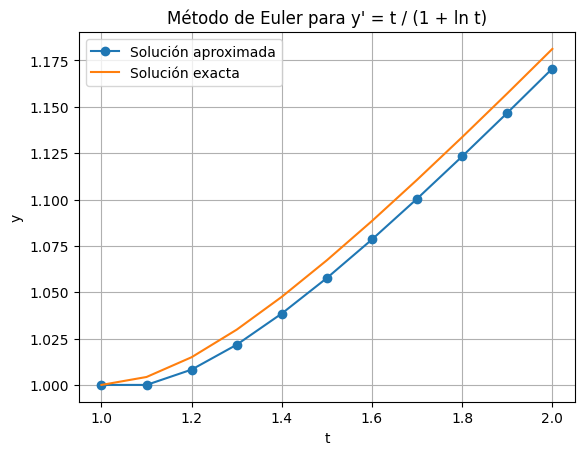


Método de Euler para y' = t tan(ln t)
      t   y_aprox   y_exact     error
0   1.0  0.000000  0.000000  0.000000
1   1.2  0.200000  0.221243  0.021243
2   1.4  0.438889  0.489682  0.050793
3   1.6  0.721243  0.812753  0.091510
4   1.8  1.052038  1.199439  0.147401
5   2.0  1.437251  1.661282  0.224031
6   2.2  1.884261  2.213502  0.329241
7   2.4  2.402270  2.876551  0.474282
8   2.6  3.002837  3.678475  0.675638
9   2.8  3.700601  4.658665  0.958064
10  3.0  4.514277  5.874100  1.359823


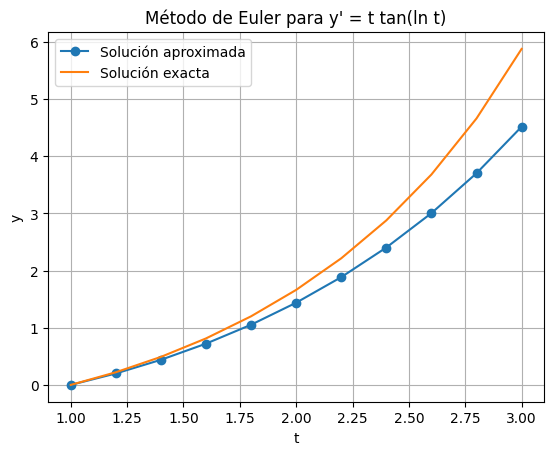


Método de Euler para y' = -3 + 2 / (1 + e^(-2t))
      t   y_aprox   y_exact     error
0   0.0 -2.000000 -2.000000  0.000000
1   0.2 -1.800000 -1.802625  0.002625
2   0.4 -1.608000 -1.620051  0.012051
3   0.6 -1.438733 -1.462950  0.024218
4   0.8 -1.301737 -1.335963  0.034226
5   1.0 -1.199251 -1.238406  0.039155
6   1.2 -1.127491 -1.166345  0.038854
7   1.4 -1.079745 -1.114648  0.034903
8   1.6 -1.049119 -1.078331  0.029212
9   1.8 -1.029954 -1.053194  0.023240
10  2.0 -1.018152 -1.035972  0.017821
11  2.2 -1.010957 -1.024257  0.013300


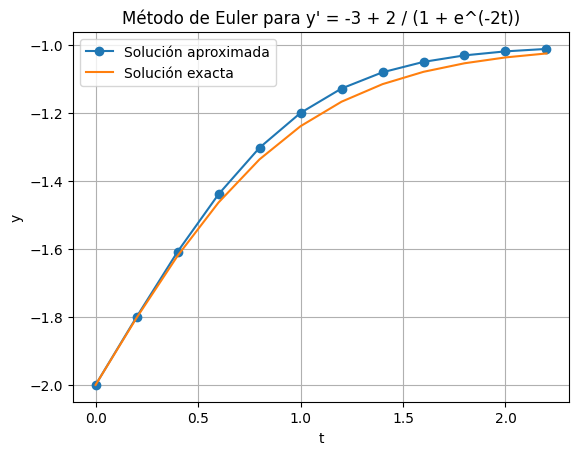


Método de Euler para y' = t^2 + (1/3) * e^-5t
      t   y_aprox   y_exact     error
0   0.0  0.333333  0.333333  0.000000
1   0.1  0.166667  0.212177  0.045510
2   0.2  0.108333  0.162626  0.054293
3   0.3  0.114167  0.164377  0.050210
4   0.4  0.162083  0.205112  0.043028
5   0.5  0.241042  0.277362  0.036320
6   0.6  0.345521  0.376596  0.031075
7   0.7  0.472760  0.500066  0.027305
8   0.8  0.621380  0.646105  0.024725
9   0.9  0.790690  0.813703  0.023013
10  1.0  0.980345  1.002246  0.021901
11  1.1  1.190173  1.211362  0.021190


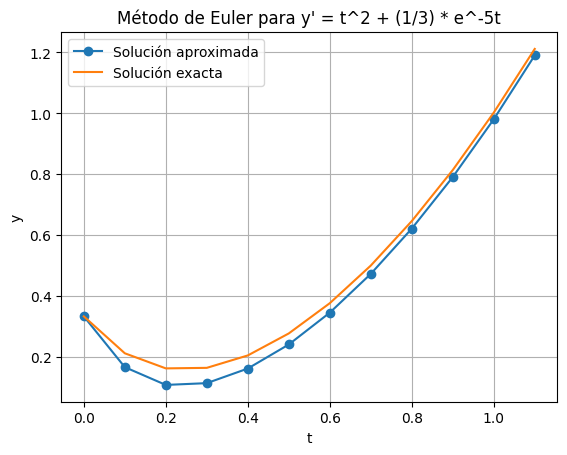

In [74]:
import pandas as pd

# Archivos CSV con los resultados
filenames = ["results_4.1.csv", "results_4.2.csv", "results_4.3.csv", "results_4.4.csv"]
titles = [
    "Método de Euler para y' = t / (1 + ln t)",
    "Método de Euler para y' = t tan(ln t)",
    "Método de Euler para y' = -3 + 2 / (1 + e^(-2t))",
    "Método de Euler para y' = t^2 + (1/3) * e^-5t"
]

# Leemos y mostramos los resultados
for filename, title in zip(filenames, titles):
    data = pd.read_csv(filename)
    print(f"\n{title}")
    print(data)

    # Graficamos la solución aproximada y exacta
    plt.figure()
    plt.plot(data["t"], data["y_aprox"], marker='o', label="Solución aproximada")
    plt.plot(data["t"], data["y_exact"], label="Solución exacta")
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

### Ejercicio 5

In [77]:
def linear_interpolation(x0: float, y0: float, x1: float, y1: float, x: float) -> float:
    return y0 + (y1 - y0) * (x - x0) / (x1 - x0)


### Literal a

In [79]:
from typing import Callable, List, Tuple
import math
import matplotlib.pyplot as plt

def ODE_euler(
    a: float,
    b: float,
    f: Callable[[float, float], float],
    y_t0: float,
    N: int
) -> Tuple[List[float], List[float]]:
    h = (b - a) / N  # Tamaño del paso
    t = a
    ts = [t]
    ys = [y_t0]

    for _ in range(N):
        y = ys[-1]
        y += h * f(t, y)
        ys.append(y)
        t += h
        ts.append(t)
    
    return ys, ts

# Función para mostrar resultados y errores
def show_results_and_errors(ts: List[float], ys: List[float], exact_solution: Callable[[float], float], title: str):
    exact_ys = [exact_solution(t) for t in ts]
    errors = [abs(e - y) for e, y in zip(exact_ys, ys)]

    for t, approx_y, exact_y, error in zip(ts, ys, exact_ys, errors):
        print(f"t = {t:.2f}, Aproximación de Euler: y = {approx_y:.5f}, Solución exacta: y = {exact_y:.5f}, Error: {error:.5f}")

# Función de interpolación lineal
def linear_interpolation(x0: float, y0: float, x1: float, y1: float, x: float) -> float:
    return y0 + (y1 - y0) * (x - x0) / (x1 - x0)

# Interpolación lineal y comparación para los puntos específicos
def interpolate_and_compare(ts, ys, exact_solution, points):
    results = []
    for t in points:
        # Encontrar los puntos entre los que se va a interpolar
        for i in range(len(ts) - 1):
            if ts[i] <= t <= ts[i+1]:
                approx = linear_interpolation(ts[i], ys[i], ts[i+1], ys[i+1], t)
                exact = exact_solution(t)
                error = abs(approx - exact)
                results.append((t, approx, exact, error))
                break
    return results

# Definir la solución exacta para el problema a)
y_exact_a = lambda t: t / (1 + math.log(t))

# Puntos a interpolar
points_a = [1.25, 1.93]

# Resultados del ejercicio 3 para el problema a)
ys_a, ts_a = ODE_euler(a=1, b=2, y_t0=1, f=lambda t, y: y / t - (y / t) ** 2, N=10)

# Interpolación y comparación
results_a = interpolate_and_compare(ts_a, ys_a, y_exact_a, points_a)

# Mostrar resultados
for t, approx, exact, error in results_a:
    print(f"t = {t:.2f}, Aproximación: y = {approx:.5f}, Solución exacta: y = {exact:.5f}, Error: {error:.5f}")



t = 1.25, Aproximación: y = 1.01498, Solución exacta: y = 1.02196, Error: 0.00698
t = 1.93, Aproximación: y = 1.15390, Solución exacta: y = 1.16439, Error: 0.01049


### Literal b

In [80]:
# Definir la solución exacta para el problema b)
y_exact_b = lambda t: t * math.tan(math.log(t))

# Puntos a interpolar
points_b = [1.25, 1.93]

# Resultados del ejercicio 3 para el problema b)
ys_b, ts_b = ODE_euler(a=1, b=3, y_t0=0, f=lambda t, y: 1 + y / t + (y / t) ** 2, N=10)

# Interpolación y comparación
results_b = interpolate_and_compare(ts_b, ys_b, y_exact_b, points_b)

# Mostrar resultados
for t, approx, exact, error in results_b:
    print(f"t = {t:.2f}, Aproximación: y = {approx:.5f}, Solución exacta: y = {exact:.5f}, Error: {error:.5f}")


t = 1.25, Aproximación: y = 0.25972, Solución exacta: y = 0.28365, Error: 0.02393
t = 1.93, Aproximación: y = 1.30243, Solución exacta: y = 1.49023, Error: 0.18780


### Literal c

In [81]:
# Definir la solución exacta para el problema c)
y_exact_c = lambda t: -3 + 2 / (1 + math.exp(-2 * t))

# Puntos a interpolar
points_c = [2.10, 2.75]

# Resultados del ejercicio 3 para el problema c)
ys_c, ts_c = ODE_euler(a=0, b=1, y_t0=-3, f=lambda t, y: -2*y + 2/(1 + math.exp(-2*t)), N=10)

# Interpolación y comparación
results_c = interpolate_and_compare(ts_c, ys_c, y_exact_c, points_c)

# Mostrar resultados
for t, approx, exact, error in results_c:
    print(f"t = {t:.2f}, Aproximación: y = {approx:.5f}, Solución exacta: y = {exact:.5f}, Error: {error:.5f}")


### Literal d

In [82]:
# Definir la solución exacta para el problema d)
y_exact_d = lambda t: t ** 2 + (1 / 3) * math.exp(-5 * t)

# Puntos a interpolar
points_d = [0.54, 0.94]

# Resultados del ejercicio 3 para el problema d)
ys_d, ts_d = ODE_euler(a=0, b=1, y_t0=1/3, f=lambda t, y: -5 * y + 5 * (t) ** 2 + 2 * t, N=10)

# Interpolación y comparación
results_d = interpolate_and_compare(ts_d, ys_d, y_exact_d, points_d)

# Mostrar resultados
for t, approx, exact, error in results_d:
    print(f"t = {t:.2f}, Aproximación: y = {approx:.5f}, Solución exacta: y = {exact:.5f}, Error: {error:.5f}")


t = 0.54, Aproximación: y = 0.28283, Solución exacta: y = 0.31400, Error: 0.03117
t = 0.94, Aproximación: y = 0.86655, Solución exacta: y = 0.88663, Error: 0.02008


### Ejercicio 6

In [87]:
import math
from typing import Callable, List, Tuple

def ODE_taylor_2nd_order(
    *,
    a: float,
    b: float,
    f: Callable[[float, float], float],
    f_prime_t: Callable[[float, float], float],
    f_prime_y: Callable[[float, float], float],
    y_t0: float,
    N: int
) -> Tuple[List[float], List[float], float]:
    h = (b - a) / N
    t = a
    ts = [t]
    ys = [y_t0]

    for _ in range(N):
        y = ys[-1]
        f_val = f(t, y)
        f_prime_t_val = f_prime_t(t, y)
        f_prime_y_val = f_prime_y(t, y)
        y += h * f_val + (h ** 2 / 2) * (f_prime_t_val + f_prime_y_val)
        ys.append(y)

        t += h
        ts.append(t)
    return ys, ts, h

# Definiciones de las funciones y sus derivadas
f_a = lambda t, y: t * math.exp(3 * t) - 2 * y
f_prime_t_a = lambda t, y: math.exp(3 * t) * (3 * t + 1)
f_prime_y_a = lambda t, y: -2

f_b = lambda t, y: 1 + (t - y)**2
f_prime_t_b = lambda t, y: 2 * (t - y)
f_prime_y_b = lambda t, y: -2 * (t - y)

f_c = lambda t, y: 1 + y / t
f_prime_t_c = lambda t, y: -y / t**2
f_prime_y_c = lambda t, y: 1 / t

f_d = lambda t, y: math.cos(2 * t) + math.sin(3 * t)
f_prime_t_d = lambda t, y: -2 * math.sin(2 * t) + 3 * math.cos(3 * t)
f_prime_y_d = lambda t, y: 0

# Parámetros para cada problema
params = [
    (f_a, f_prime_t_a, f_prime_y_a, 0, 1, 0, 10),   # Cambié N de 0.5 a 10
    (f_b, f_prime_t_b, f_prime_y_b, 2, 3, 1, 10),  # Cambié N de 0.5 a 10
    (f_c, f_prime_t_c, f_prime_y_c, 1, 2, 2, 10),  # Cambié N de 0.25 a 10
    (f_d, f_prime_t_d, f_prime_y_d, 0, 1, 1, 10)   # Cambié N de 0.25 a 10
]

# Resolver cada problema usando el método de Taylor de 2do orden
for f, f_prime_t, f_prime_y, a, b, y_t0, N in params:
    ys, ts, h = ODE_taylor_2nd_order(
        a=a, b=b, f=f, f_prime_t=f_prime_t, f_prime_y=f_prime_y, y_t0=y_t0, N=N
    )
    print(f"Intervalo [{a}, {b}], Condición inicial {y_t0}, Tamaño del paso {h}")
    for t, y in zip(ts, ys):
        print(f"t={t:.2f}, y={y:.5f}")
    print()

Intervalo [0, 1], Condición inicial 0, Tamaño del paso 0.1
t=0.00, y=0.00000
t=0.10, y=-0.00500
t=0.20, y=0.00827
t=0.30, y=0.04764
t=0.40, y=0.12526
t=0.50, y=0.25954
t=0.60, y=0.47774
t=0.70, y=0.81986
t=0.80, y=1.34410
t=0.90, y=2.13453
t=1.00, y=3.31207

Intervalo [2, 3], Condición inicial 1, Tamaño del paso 0.1
t=2.00, y=1.00000
t=2.10, y=1.20000
t=2.20, y=1.38100
t=2.30, y=1.54808
t=2.40, y=1.70462
t=2.50, y=1.85297
t=2.60, y=1.99484
t=2.70, y=2.13146
t=2.80, y=2.26378
t=2.90, y=2.39254
t=3.00, y=2.51829

Intervalo [1, 2], Condición inicial 2, Tamaño del paso 0.1
t=1.00, y=2.00000
t=1.10, y=2.29500
t=1.20, y=2.59870
t=1.30, y=2.91040
t=1.40, y=3.22951
t=1.50, y=3.55552
t=1.60, y=3.88799
t=1.70, y=4.22652
t=1.80, y=4.57077
t=1.90, y=4.92043
t=2.00, y=5.27521

Intervalo [0, 1], Condición inicial 1, Tamaño del paso 0.1
t=0.00, y=1.00000
t=0.10, y=1.11500
t=0.20, y=1.25490
t=0.30, y=1.41196
t=0.40, y=1.57650
t=0.50, y=1.73764
t=0.60, y=1.88406
t=0.70, y=2.00496
t=0.80, y=2.09085
t=0.

### Ejercicio 7

In [86]:
import math
from typing import Callable, List, Tuple

def ODE_taylor_4th_order(
    *,
    a: float,
    b: float,
    f: Callable[[float, float], float],
    f_prime_t: Callable[[float, float], float],
    f_prime_y: Callable[[float, float], float],
    f_double_prime_t: Callable[[float, float], float],
    f_double_prime_y: Callable[[float, float], float],
    f_triple_prime_t: Callable[[float, float], float],
    f_triple_prime_y: Callable[[float, float], float],
    y_t0: float,
    N: int
) -> Tuple[List[float], List[float], float]:
    h = (b - a) / N
    t = a
    ts = [t]
    ys = [y_t0]

    for _ in range(N):
        y = ys[-1]
        f_val = f(t, y)
        f_prime_t_val = f_prime_t(t, y)
        f_prime_y_val = f_prime_y(t, y)
        f_double_prime_t_val = f_double_prime_t(t, y)
        f_double_prime_y_val = f_double_prime_y(t, y)
        f_triple_prime_t_val = f_triple_prime_t(t, y)
        f_triple_prime_y_val = f_triple_prime_y(t, y)

        y += (h * f_val + 
              (h ** 2 / 2) * (f_prime_t_val + f_prime_y_val) + 
              (h ** 3 / 6) * (f_double_prime_t_val + f_double_prime_y_val) + 
              (h ** 4 / 24) * (f_triple_prime_t_val + f_triple_prime_y_val))
        ys.append(y)

        t += h
        ts.append(t)
    return ys, ts, h

# Definiciones de las funciones y sus derivadas hasta el tercer orden
f_a = lambda t, y: t * math.exp(3 * t) - 2 * y
f_prime_t_a = lambda t, y: math.exp(3 * t) * (3 * t + 1)
f_prime_y_a = lambda t, y: -2
f_double_prime_t_a = lambda t, y: 9 * t * math.exp(3 * t) + 6 * math.exp(3 * t)
f_double_prime_y_a = lambda t, y: 0
f_triple_prime_t_a = lambda t, y: 27 * t * math.exp(3 * t) + 27 * math.exp(3 * t)
f_triple_prime_y_a = lambda t, y: 0

f_b = lambda t, y: 1 + (t - y)**2
f_prime_t_b = lambda t, y: 2 * (t - y)
f_prime_y_b = lambda t, y: -2 * (t - y)
f_double_prime_t_b = lambda t, y: 2
f_double_prime_y_b = lambda t, y: -2
f_triple_prime_t_b = lambda t, y: 0
f_triple_prime_y_b = lambda t, y: 0

f_c = lambda t, y: 1 + y / t
f_prime_t_c = lambda t, y: -y / t**2
f_prime_y_c = lambda t, y: 1 / t
f_double_prime_t_c = lambda t, y: 2 * y / t**3
f_double_prime_y_c = lambda t, y: -1 / t**2
f_triple_prime_t_c = lambda t, y: -6 * y / t**4
f_triple_prime_y_c = lambda t, y: 2 / t**3

f_d = lambda t, y: math.cos(2 * t) + math.sin(3 * t)
f_prime_t_d = lambda t, y: -2 * math.sin(2 * t) + 3 * math.cos(3 * t)
f_prime_y_d = lambda t, y: 0
f_double_prime_t_d = lambda t, y: -4 * math.cos(2 * t) - 9 * math.sin(3 * t)
f_double_prime_y_d = lambda t, y: 0
f_triple_prime_t_d = lambda t, y: 8 * math.sin(2 * t) - 27 * math.cos(3 * t)
f_triple_prime_y_d = lambda t, y: 0

# Parámetros para cada problema
params = [
    (f_a, f_prime_t_a, f_prime_y_a, f_double_prime_t_a, f_double_prime_y_a, f_triple_prime_t_a, f_triple_prime_y_a, 0, 1, 0, 10),
    (f_b, f_prime_t_b, f_prime_y_b, f_double_prime_t_b, f_double_prime_y_b, f_triple_prime_t_b, f_triple_prime_y_b, 2, 3, 1, 10),
    (f_c, f_prime_t_c, f_prime_y_c, f_double_prime_t_c, f_double_prime_y_c, f_triple_prime_t_c, f_triple_prime_y_c, 1, 2, 2, 10),
    (f_d, f_prime_t_d, f_prime_y_d, f_double_prime_t_d, f_double_prime_y_d, f_triple_prime_t_d, f_triple_prime_y_d, 0, 1, 1, 10)
]

# Resolver cada problema usando el método de Taylor de 4to orden
for f, f_prime_t, f_prime_y, f_double_prime_t, f_double_prime_y, f_triple_prime_t, f_triple_prime_y, a, b, y_t0, N in params:
    ys, ts, h = ODE_taylor_4th_order(
        a=a, b=b, f=f, f_prime_t=f_prime_t, f_prime_y=f_prime_y,
        f_double_prime_t=f_double_prime_t, f_double_prime_y=f_double_prime_y,
        f_triple_prime_t=f_triple_prime_t, f_triple_prime_y=f_triple_prime_y,
        y_t0=y_t0, N=N
    )
    print(f"Intervalo [{a}, {b}], Condición inicial {y_t0}, Tamaño del paso {h}")
    for t, y in zip(ts, ys):
        print(f"t={t:.2f}, y={y:.5f}")
    print()


Intervalo [0, 1], Condición inicial 0, Tamaño del paso 0.1
t=0.00, y=0.00000
t=0.10, y=-0.00389
t=0.20, y=0.01088
t=0.30, y=0.05234
t=0.40, y=0.13295
t=0.50, y=0.27152
t=0.60, y=0.49592
t=0.70, y=0.84700
t=0.80, y=1.38411
t=0.90, y=2.19302
t=1.00, y=3.39701

Intervalo [2, 3], Condición inicial 1, Tamaño del paso 0.1
t=2.00, y=1.00000
t=2.10, y=1.20000
t=2.20, y=1.38100
t=2.30, y=1.54808
t=2.40, y=1.70462
t=2.50, y=1.85297
t=2.60, y=1.99484
t=2.70, y=2.13146
t=2.80, y=2.26378
t=2.90, y=2.39254
t=3.00, y=2.51829

Intervalo [1, 2], Condición inicial 2, Tamaño del paso 0.1
t=1.00, y=2.00000
t=1.10, y=2.29546
t=1.20, y=2.59960
t=1.30, y=2.91173
t=1.40, y=3.23127
t=1.50, y=3.55769
t=1.60, y=3.89056
t=1.70, y=4.22948
t=1.80, y=4.57412
t=1.90, y=4.92415
t=2.00, y=5.27932

Intervalo [0, 1], Condición inicial 1, Tamaño del paso 0.1
t=0.00, y=1.00000
t=0.10, y=1.11422
t=0.20, y=1.25293
t=0.30, y=1.40844
t=0.40, y=1.57121
t=0.50, y=1.73047
t=0.60, y=1.87506
t=0.70, y=1.99430
t=0.80, y=2.07887
t=0.